# 痛苦指数 (Rolling Volatility & Sharpe)

In [1]:
import akshare as ak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [12]:
print('⚔️ 正在让证券和煤炭进行 PK...')
codes = {'012363':'国泰证券','013275':'富国煤炭'}
data = pd.DataFrame()

⚔️ 正在让证券和煤炭进行 PK...


In [13]:
for code, name in codes.items():
    df = ak.fund_open_fund_info_em(symbol=code, indicator="单位净值走势")
    df['net_value'] = pd.to_numeric(df['单位净值'])
    df['date'] = pd.to_datetime(df['净值日期'])
    df = df.sort_values('date').set_index('date')
    
    # 算出每日涨跌幅
    data[name] = df['net_value'].pct_change()

data.dropna(inplace=True)


In [14]:
window=30
rolling_return=data.rolling(window).mean()*252
rolling_vol = data.rolling(window).std()*np.sqrt(252)
rolling_sharpe=rolling_return/rolling_vol


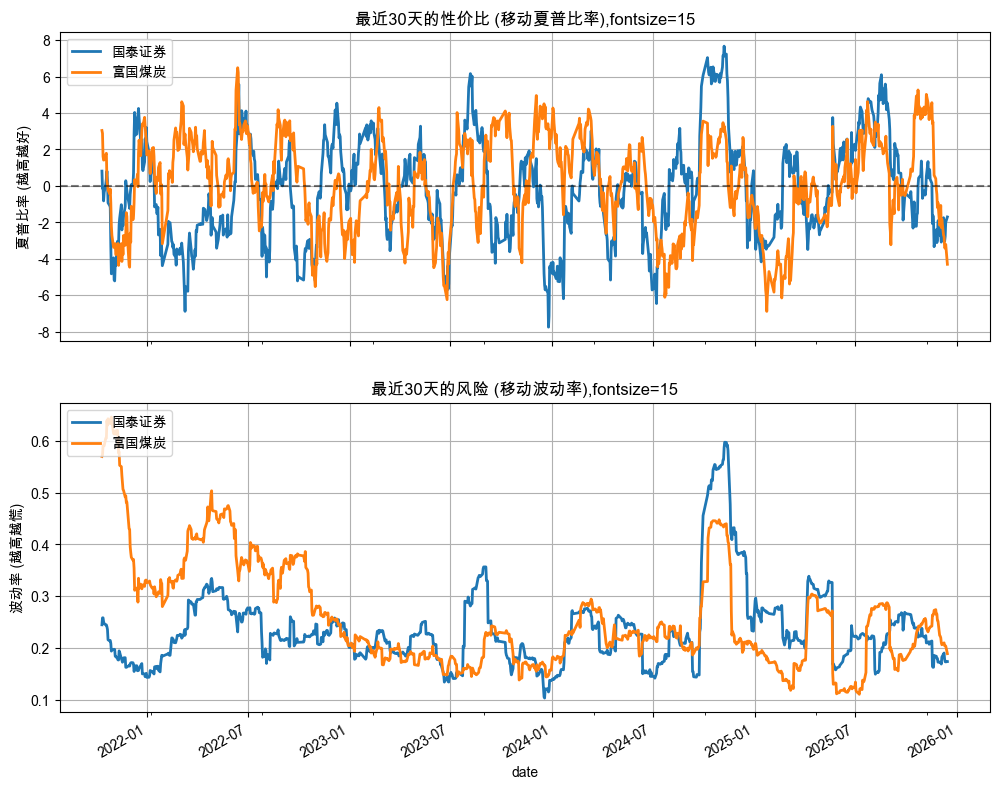

In [16]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,10),sharex=True)
rolling_sharpe.plot(ax=ax1,linewidth=2)
ax1.axhline(0,color='black',linestyle='--',alpha=0.5)
ax1.set_title(f'最近{window}天的性价比 (移动夏普比率),fontsize=15')
ax1.set_ylabel('夏普比率 (越高越好)')
ax1.grid(True)
ax1.legend(loc='upper left')
rolling_vol.plot(ax=ax2,linewidth=2,linestyle='-')
ax2.set_title(f'最近{window}天的风险 (移动波动率),fontsize=15')
ax2.set_ylabel('波动率 (越高越慌)')
ax2.grid(True)
ax2.legend(loc = 'upper left')
plt.show()

In [17]:
print(f'📊 最新状态诊断 (近{window}天):')
last_day = rolling_sharpe.iloc[-1]
for name in codes.values():
    score=last_day[name]
    print(f'{name}夏普:{score:.2f}')
    if score <0:
        print(' 👉 垃圾时间！收益跑不赢风险 (亏钱效应)。')
    elif score >2:
        print('👉 黄金时刻！性价比极高。')
    else:
        print(' 👉 平平无奇。')

📊 最新状态诊断 (近30天):
国泰证券夏普:-1.71
 👉 垃圾时间！收益跑不赢风险 (亏钱效应)。
富国煤炭夏普:-4.30
 👉 垃圾时间！收益跑不赢风险 (亏钱效应)。
